In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import zipfile
import os

# Load Data from google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/Speech_Emotion_Recogntion/audio_src/RAVDESS.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

Mounted at /content/drive


# Normalization

Sample rate : 48000
Original audio :


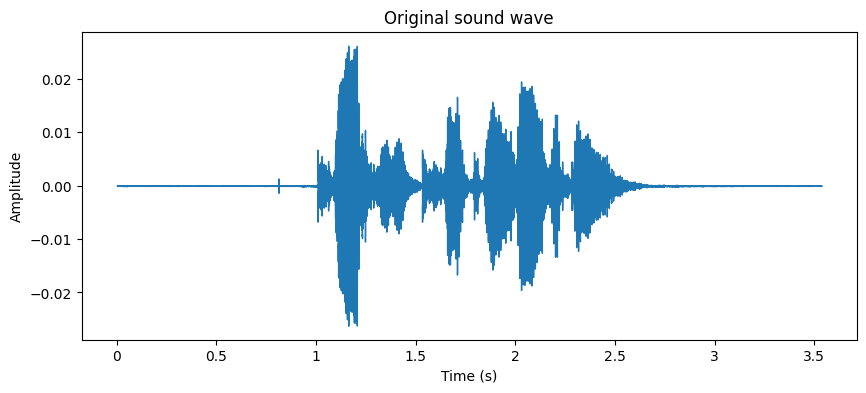

Original sample rate: 48000
Resampled to: 16000
Audio after resampling :


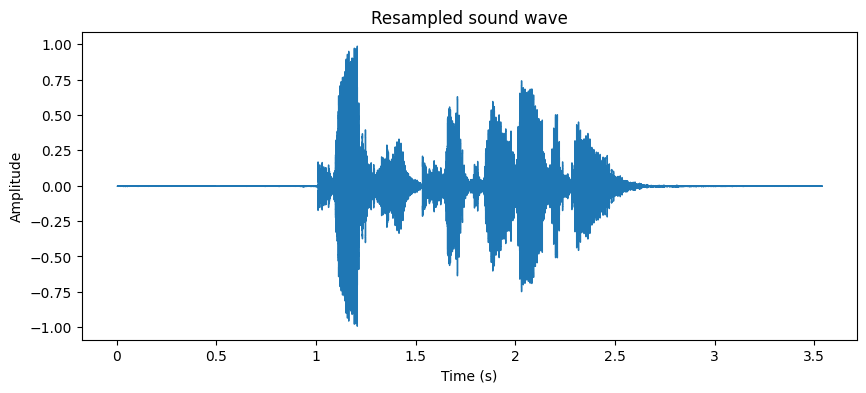

In [3]:
file_path = "/content/Actor_01/03-01-02-01-01-01-01.wav"
y, sr = librosa.load(file_path, sr=None)  # Load with native sample rate

print("Sample rate : " + str(sr))

# Play original audio
print("Original audio :")
display(Audio(y, rate=sr))

# Show original sound wave
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Original sound wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Normalization based on maximum amplitude
y_normalized = y / np.max(np.abs(y))

# Resampling at 16000 Hz
target_sr = 16000
y_resampled = librosa.resample(y_normalized, orig_sr=sr, target_sr=target_sr)

print(f"Original sample rate: {sr}")
print(f"Resampled to: {target_sr}")

# Play resampled audio
print("Audio after resampling :")
display(Audio(y_resampled, rate=target_sr))

# Show resampled sound wave
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_resampled, sr=target_sr)
plt.title("Resampled sound wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
dataset_path = '../dataset/'

audio_data = []
labels = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):  # Is a direcotry
        for file in os.listdir(folder_path):
            if file.endswith('.wav'):  # Is audio file .wav
                file_path = os.path.join(folder_path, file)

                # Load audio file
                y, sr = librosa.load(file_path, sr=None)  # sr=None to keep the original sample rate

                audio_data.append(y)
                labels.append(file.split('.')[0])

                print(f"Chargé {file} avec taux d'échantillonnage {sr}")

Chargé 03-01-01-01-01-01-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-01-01-01-02-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-01-01-02-01-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-01-01-02-02-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-02-01-01-01-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-02-01-01-02-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-02-01-02-01-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-02-01-02-02-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-02-02-01-01-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-02-02-01-02-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-02-02-02-01-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-02-02-02-02-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-03-01-01-01-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-03-01-01-02-01.wav avec taux d'échantillonnage 48000
Chargé 03-01-03-01-02-01-01.wav avec taux d'échantillonnage 48000
Chargé 03-

# Changing the way audio files are represented

In [ ]:
# Create a folder to save audio representations
spectrograms_dir = 'audio_representations/spectrograms'
os.makedirs(spectrograms_dir, exist_ok=True)

# Create a folder to save MFCCs images
MFCC_dir = 'audio_representations/MFCCs'
os.makedirs(MFCC_dir, exist_ok=True)

## Spectrograms

In [ ]:
def generate_spectrogram(y, sr, output_file):
    # Compute spectrogram with short-time Fourier transform (STFT)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Generate and save
    plt.figure(figsize=(2.56, 2.56))
    plt.axis('off')
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    plt.close()

In [ ]:
for (y, label) in zip(audio_data, labels):
    output_file = os.path.join(spectrograms_dir, f'{label}.png')
    generate_spectrogram(y, sr, output_file)
    print(f"Spectrogramme sauvegardé sous {output_file}")


Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-01-01-01-01-01.png
Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-01-01-01-02-01.png
Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-01-01-02-01-01.png
Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-01-01-02-02-01.png
Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-02-01-01-01-01.png
Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-02-01-01-02-01.png
Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-02-01-02-01-01.png
Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-02-01-02-02-01.png
Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-02-02-01-01-01.png
Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-02-02-01-02-01.png
Spectrogramme sauvegardé sous audio_representations/spectrograms\03-01-02-02-02-01-01.png
Spectrogra

## MFCCs

In [ ]:
def generate_mfcc(y, sr, output_file, n_mfcc=13):
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Generate and save
    plt.figure(figsize=(2.56, 2.56))
    plt.axis('off')
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    plt.close()

In [ ]:
for (y, label) in zip(audio_data, labels):
    output_file = os.path.join(MFCC_dir, f'{label}.png')
    generate_mfcc(y, sr, output_file)
    print(f"MFCCs sauvegardé sous {output_file}")

MFCCs sauvegardé sous audio_representations/MFCCs\03-01-01-01-01-01-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-01-01-01-02-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-01-01-02-01-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-01-01-02-02-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-02-01-01-01-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-02-01-01-02-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-02-01-02-01-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-02-01-02-02-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-02-02-01-01-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-02-02-01-02-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-02-02-02-01-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-02-02-02-02-01.png
MFCCs sauvegardé sous audio_representations/MFCCs\03-01-03-01-01-01-01.png
MFCCs sauvegardé sous aud